In [ ]:
# DON'T DO THIS
####### !pip install numpy

In [ ]:
# Ref: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

# Jupyter Shortcuts and tricks
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [ ]:
######### This is Best way ###########
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

In [ ]:
#### Below is always best practice 
# python -m pip install <package>

# because is more explicit about where the package will be installed

In [ ]:
!echo $PATH

In [ ]:
!type python

### Prints all available Python installations
!type -a python
!type -a python3

!type -a pip
!type -a pip3

In [ ]:
## The list of paths searched by Python on import is found in sys.path:
import sys
sys.path


In [ ]:

# By default, the first place Python looks for a module is an empty path, meaning the current working directory.
# If the module is not found there, it goes down the list of locations until the module is found. 
# You can find out which location has been used using the __path__ attribute of an imported module:

import numpy as np
np.__path__

In [ ]:
# To see the kernels you have available on your system, you can run the following command in the shell:

!jupyter kernelspec list

# The Python executable being used in the notebook can be determined using
!type python
!type python3
sys.executable

In [ ]:
# Install a pip package in the current Jupyter kernel# Insta 
import sys
!{sys.executable} -m pip install tensorflow scikit-image matplotlib watermark

In [ ]:
%load_ext watermark
%watermark -p tensorflow,skimage,matplotlib,numpy,matplotlib,random

In [ ]:
# Imports

import tensorflow as tf
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
import numpy as np
import random
# Import the `pyplot` module
import matplotlib.pyplot as plt 


In [ ]:
# Loading And Exploring The Data

In [22]:
def load_data(data_dir):
    #Get all teh directories in data directory
    data_directories = [d for d in os.listdir(data_dir)
        if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in data_directories:
        label_directory = os.path.join(data_dir, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = '/Users/jay/github.com/jayasagar/traffic-sign-label-tensorflow'
train_data_dir = os.path.join(ROOT_PATH, 'Training');
test_data_dir = os.path.join(ROOT_PATH, 'Testing');

images, labels = load_data(train_data_dir)

# Rescale the images in the `images` array
# COMMENT BELOW LINE TO SEE ORIGINAL IMAGES
images = [transform.resize(image, (28, 28)) for image in images]

images = np.array(images)
# COMMENT BELOW LINE TO TURN OFF GRAY SCLAE
# Convert `images28` to grayscale
images = rgb2gray(images)

print('images.size:', images.shape)
print('images.ndim:', images.ndim)
print('images.size:', images.size)

# labels = np.array(labels)
# print('labels.ndim:', labels.ndim)
# print('labels.size:',labels.size)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


images.size: (4575, 28, 28)
images.ndim: 3
images.size: 3586800


In [ ]:
# ?, you can access the Docstring for quick reference on syntax.
?str.replace()

In [ ]:
# IPython Magic Commands

# This will list all magic commands
%lsmagic



In [ ]:
# Make a histogram with 62 bins/buckets as we have 62 labels as of now :)
plt.hist(labels, 62)

# Show the plot
plt.show()

In [ ]:
# Visualizing The Traffic Signs

In [ ]:
# Transfor IMAGES to same size

In [ ]:
# Total images size images.size: 4575.
# Pick random images to see whether they are all same  size.
traffic_sign_images = [0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400]

for i in range(len(traffic_sign_images)):
    plt.subplot(3, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_sign_images[i]])
    plt.subplots_adjust(wspace=0.5)
plt.show()    

In [ ]:
# These images are not of the same size!

In [ ]:
# Now show the image shape

for i in range(len(traffic_sign_images)):
    plt.subplot(3, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_sign_images[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show() 
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_sign_images[i]].shape, 
                                                  images[traffic_sign_images[i]].min(), 
                                                  images[traffic_sign_images[i]].max()))

In [ ]:
# Plot all 62 traffic sign images and each label images count 

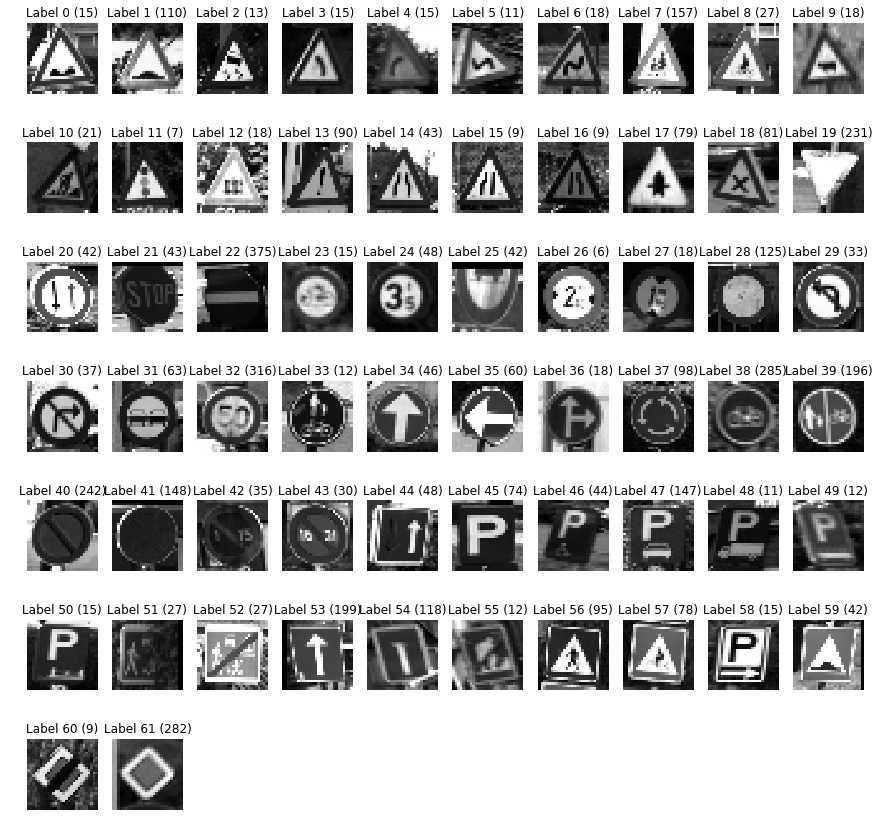

In [24]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))
# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    plt.subplot(7, 10, i)
    plt.axis('off')
    # Show title on each label image
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
#     plt.imshow(image)
# COMMENT BELOW to see color images
    plt.imshow(image, cmap="gray")
    
# Show the plot
plt.show()

In [ ]:
# Note that you indeed have to specify the color map or cmap and set it to "gray" to plot the images in grayscale. 
# That is because imshow() by default uses, by default, a heatmap-like color map